In [3]:
import numpy as np
import pandas as pd
from pycaret.regression import *

In [4]:
data_path = "E:/Generic ML Project/ML_Project/notebook/data/stud.csv"
df = pd.read_csv(data_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [6]:
# from sklearn.impute import SimpleImputer

# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.compose import ColumnTransformer


# numerical_columns = ["reading_score", "writing_score"]
# categorical_columns = [
#     "gender",
#     "race_ethnicity",
#     "parental_level_of_education",
#     "lunch",
#     "test_preparation_course",
# ]

# num_pipeline = Pipeline(
#     steps=[
#         ("imputer", SimpleImputer(strategy="median")),
#         ("scaler", StandardScaler()),
#     ]
# )
# cat_pipeline = Pipeline(
#     steps=[
#         ("imputer", SimpleImputer(strategy="most_frequent")),
#         ("one_hot_encode", OneHotEncoder()),
#         ("scaler", StandardScaler(with_mean=False)),
#     ]
# )

# preprocessor = ColumnTransformer(
#     [
#         ("numeric_pipeline", num_pipeline, numerical_columns),
#         ("categorical_pipeline", cat_pipeline, categorical_columns),
#     ]
# )

In [7]:
# train_set_processed = preprocessor.fit_transform(train_set)
# test_set_processed = preprocessor.transform(test_set)

In [8]:
# encoded_feature_names = preprocessor.get_feature_names_out()
# encoded_feature_names

In [9]:
# Initialize the PyCaret regression setup without experiment logging
regression_setup = setup(
    data=train_set,
    target='math_score',
    session_id=124,
    normalize=True,
    polynomial_features=True,
    remove_multicollinearity=True,
    log_experiment=False,  # Disable experiment logging
    experiment_name='math_score_regression',
    verbose=False  # Suppress logs
)

In [10]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [11]:
best_model = compare_models(
    n_select=1,
    sort='R2',
    # include=['lr', 'ridge', 'lasso', 'en', 'br', 'lightgbm', 'xgboost']
)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,4.6560,34.0733,5.8241,0.8384,0.0933,0.0746,0.1140
ridge,Ridge Regression,4.6559,34.3477,5.8470,0.8373,0.0938,0.0746,0.0960
br,Bayesian Ridge,4.9042,37.2747,6.0878,0.8237,0.0987,0.0790,0.0940
omp,Orthogonal Matching Pursuit,4.9417,38.2025,6.1665,0.8177,0.1003,0.0794,0.0990
gbr,Gradient Boosting Regressor,5.0137,38.8749,6.2166,0.8151,0.1029,0.0814,0.1690
catboost,CatBoost Regressor,4.9736,38.8775,6.2182,0.8145,0.1003,0.0795,1.5320
llar,Lasso Least Angle Regression,5.0128,39.9570,6.2872,0.8128,0.1042,0.0823,0.1020
lasso,Lasso Regression,5.0128,39.9581,6.2873,0.8128,0.1042,0.0823,0.0990
rf,Random Forest Regressor,5.0240,39.8309,6.2877,0.8098,0.1036,0.0810,0.3350
lightgbm,Light Gradient Boosting Machine,5.1746,40.9035,6.3777,0.8041,0.1037,0.0830,0.2240


In [12]:
print(best_model)

HuberRegressor()


In [13]:
# Tune the best model for better performance
tuned_model = tune_model(best_model, 
                         optimize='MAE',  # Optimize for Mean Absolute Error
                         )

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.2056,30.0024,5.4774,0.8348,0.0866,0.0657
1,4.5044,28.2974,5.3195,0.8385,0.0822,0.0708
2,5.0738,37.9154,6.1576,0.8766,0.1034,0.0867
3,4.9911,40.7338,6.3823,0.8375,0.1087,0.0846
4,4.7505,38.6432,6.2164,0.8150,0.1040,0.0801
5,4.4583,34.1909,5.8473,0.8042,0.0930,0.0701
6,5.0438,36.8649,6.0716,0.8630,0.0910,0.0773
7,4.6079,33.8267,5.8161,0.8573,0.0947,0.0752
8,4.3927,28.3105,5.3208,0.8129,0.0824,0.0659


Fitting 10 folds for each of 10 candidates, totalling 100 fits


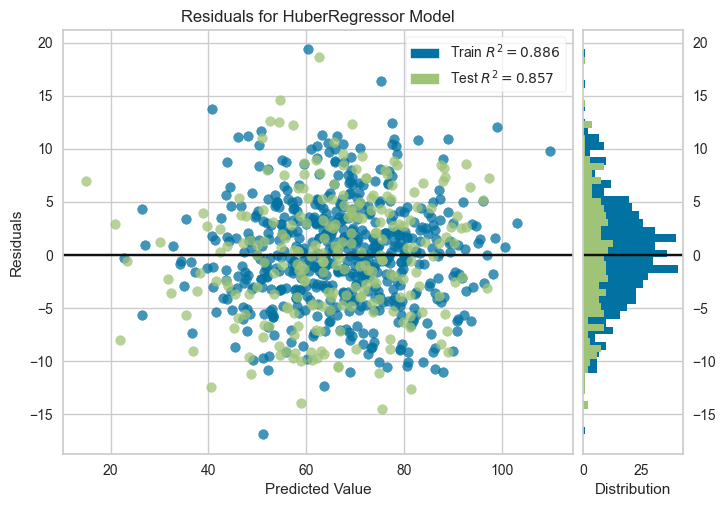

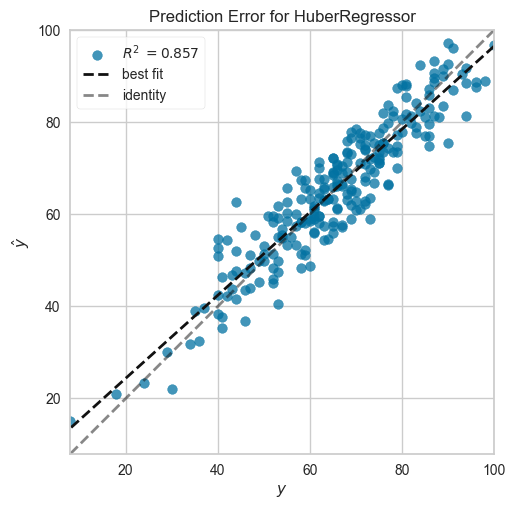

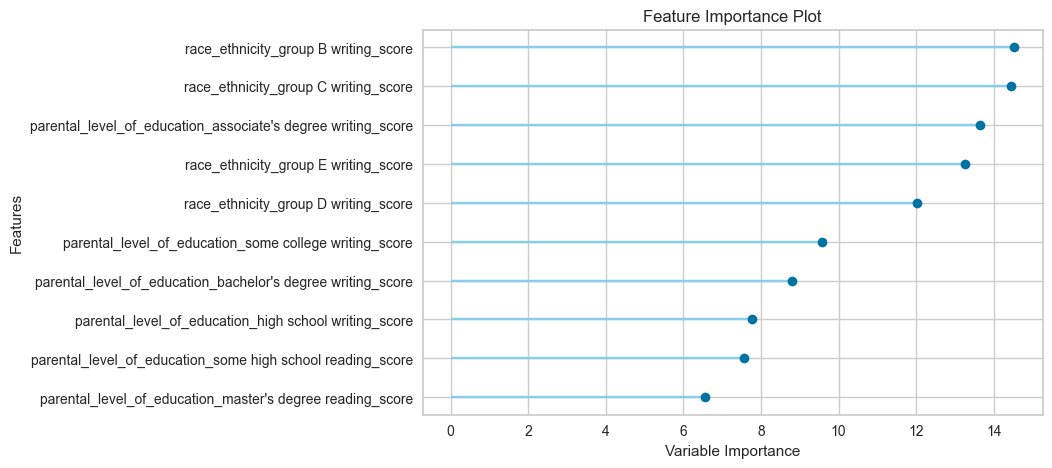

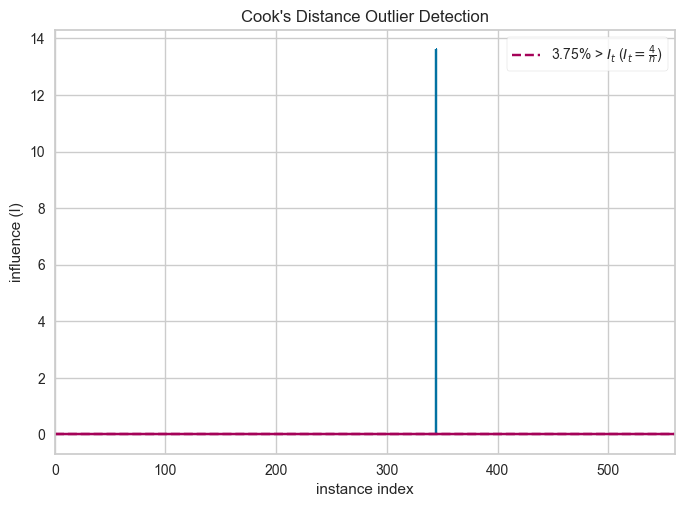

In [14]:
# Evaluate the tuned model
plot_model(tuned_model, plot='residuals')
plot_model(tuned_model, plot='error')
plot_model(tuned_model, plot='feature')
plot_model(tuned_model, plot='cooks')

In [15]:
# evaluate model for better understanding using pycaret
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [16]:
# Finalize the model for deployment
final_model = finalize_model(tuned_model)
final_model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['reading_score', 'writing_score'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['gender', 'race_ethnicity',
                                             'parental_level_of_education',
                                             'lunch',
                                             'test_preparation_course'],
                                    transformer=SimpleImputer(strategy='most_frequent')...
                                                              use_cat_names=True))),
                ('polynomial_features',
                 TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                ('remove_multicollinearity',
                 TransformerWrapper(exclude=[],
                                    transformer=RemoveMulticollinearity(threshold=0.9))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('actual_estimator', HuberRegressor(alpha=0.005, epsilon=1.5))])

In [17]:
# Predict on the test dataset
predictions = predict_model(final_model, data=test_set)
predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,4.6620,33.9039,5.8227,0.8607,0.1816,0.0791


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,math_score,prediction_label
521,female,group C,associate's degree,standard,none,86,84,91,78.228847
737,female,group B,some college,free/reduced,completed,66,73,53,55.901434
740,male,group D,bachelor's degree,standard,none,73,72,80,76.420366
660,male,group C,some college,free/reduced,none,77,73,74,78.279358
411,male,group E,some college,standard,completed,83,78,84,87.070667
...,...,...,...,...,...,...,...,...,...
408,female,group D,high school,free/reduced,completed,57,56,52,47.276886
332,male,group E,associate's degree,standard,completed,56,53,62,61.022439
208,female,group B,some college,free/reduced,none,81,76,74,69.343708
613,female,group C,associate's degree,standard,none,77,74,65,68.069167


In [18]:
# Extract true and predicted values
true_values = test_set['math_score']
# Verify the actual column name in predictions
print(predictions.columns)

# Replace 'Label' with the correct column name based on the output above
predicted_values = predictions['prediction_label']  # Update 'Label' if the column name is different

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'reading_score', 'writing_score',
       'math_score', 'prediction_label'],
      dtype='object')


In [19]:
# Evaluate performance
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
# Calculate metrics
mse = mean_squared_error(true_values, predicted_values)
mae = mean_absolute_error(true_values, predicted_values)
r2 = r2_score(true_values, predicted_values)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 33.90386180267872
Mean Absolute Error: 4.662001949777342
R-squared: 0.8606719621618342


In [21]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [26]:
df_filtered = df[(df['reading_score'] > 80) & (df['reading_score'] < 90) & (df['writing_score'] > 80) & (df['writing_score'] < 95)]
df_filtered

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
16,male,group C,high school,standard,none,88,89,86
34,male,group E,some college,standard,none,97,87,82
36,female,group D,associate's degree,standard,none,74,81,83
49,male,group C,high school,standard,completed,82,84,82
54,female,group C,some high school,free/reduced,completed,71,84,87
...,...,...,...,...,...,...,...,...
956,male,group C,some college,standard,none,84,87,81
982,male,group B,some high school,standard,completed,79,85,86
983,female,group A,some college,standard,completed,78,87,91
989,female,group D,some college,free/reduced,completed,67,86,83


In [22]:
# Create a sample input for prediction
sample_data = pd.DataFrame({
    'gender': ['female'],
    'race_ethnicity': ['group B'],
    'parental_level_of_education': ["bachelor's degree"],
    'lunch': ['standard'],
    'test_preparation_course': ['none'],
    'reading_score': [85],
    'writing_score': [88]
})

# Predict using the finalized model
sample_prediction = predict_model(final_model, data=sample_data)
print(sample_prediction)

   gender race_ethnicity parental_level_of_education     lunch  \
0  female        group B           bachelor's degree  standard   

  test_preparation_course  reading_score  writing_score  prediction_label  
0                    none             85             88         81.707018  


In [27]:
sample_rows = pd.DataFrame({
    'gender': ['female', 'female', 'female'],
    'race_ethnicity': ['group B', 'group C', 'group B'],
    'parental_level_of_education': ["bachelor's degree", "some college", "master's degree"],
    'lunch': ['standard', 'standard', 'standard'],
    'test_preparation_course': ['none', 'completed', 'none'],
    'reading_score': [72, 90, 95],
    'writing_score': [74, 88, 93]
})
sample_rows

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93


In [28]:
sample_prediction = predict_model(final_model, data=sample_rows)
print(sample_prediction)

   gender race_ethnicity parental_level_of_education     lunch  \
0  female        group B           bachelor's degree  standard   
1  female        group C                some college  standard   
2  female        group B             master's degree  standard   

  test_preparation_course  reading_score  writing_score  prediction_label  
0                    none             72             74         66.373965  
1               completed             90             88         78.616131  
2                    none             95             93         84.891632  


In [ ]:
mse = mean_squared_error(df[:3]['math_score'], sample_prediction['prediction_label'])
mae = mean_absolute_error(df[:3]['math_score'], sample_prediction['prediction_label'])
r2 = r2_score(df[:3]['math_score'], sample_prediction['prediction_label'])

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
# pucaret trained model results

Mean Squared Error: 50.072553531607014
Mean Absolute Error: 6.783511191149562
R-squared: 0.41776100544643


In [ ]:
# manualy trained model results from last cell of this book
# Mean Squared Error: 47.8615013587122
# Mean Absolute Error: 6.737898957122927
# R-squared: 0.4434709144335791

In [37]:
import dill

loaded_model = dill.load(open("E:/Generic ML Project/ML_Project/artifacts/model.pkl", "rb"))
loaded_model

LinearRegression()

In [38]:
preprocessor_loaded = dill.load(open("E:/Generic ML Project/ML_Project/artifacts/preprocessor.pkl", "rb"))
preprocessor_loaded

ColumnTransformer(transformers=[('numeric_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['reading_score', 'writing_score']),
                                ('categorical_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot_encode',
                                                  OneHotEncoder()),
                                                 ('scaler',
                                                  StandardScaler(with_mean=False))]),
                                 ['gender', 'race_ethnicity',
                                  'parental_level_of_education', 'lunch',
                                  'test_preparation_course'])])

In [39]:
sample_rows = pd.DataFrame({
    'gender': ['female', 'female', 'female'],
    'race_ethnicity': ['group B', 'group C', 'group B'],
    'parental_level_of_education': ["bachelor's degree", "some college", "master's degree"],
    'lunch': ['standard', 'standard', 'standard'],
    'test_preparation_course': ['none', 'completed', 'none'],
    'reading_score': [72, 90, 95],
    'writing_score': [74, 88, 93]
})
sample_rows

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93


In [40]:
processed_data = preprocessor_loaded.transform(sample_rows)
processed_data

array([[0.169175  , 0.36772239, 2.00276196, 0.        , 0.        ,
        2.54268248, 0.        , 0.        , 0.        , 0.        ,
        3.07728727, 0.        , 0.        , 0.        , 0.        ,
        0.        , 2.10183809, 0.        , 2.09830697],
       [1.4146351 , 1.29635617, 2.00276196, 0.        , 0.        ,
        0.        , 2.13504205, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 2.38539363, 0.        ,
        0.        , 2.10183809, 2.09830697, 0.        ],
       [1.76059624, 1.62801109, 2.00276196, 0.        , 0.        ,
        2.54268248, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 4.25249263, 0.        , 0.        ,
        0.        , 2.10183809, 0.        , 2.09830697]])

In [41]:
predicted_new = loaded_model.predict(processed_data)
predicted_new

array([66.11021332, 77.93786548, 84.61395529])

In [42]:
mse = mean_squared_error(df[:3]['math_score'], predicted_new)
mae = mean_absolute_error(df[:3]['math_score'], predicted_new)
r2 = r2_score(df[:3]['math_score'], predicted_new)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 47.8615013587122
Mean Absolute Error: 6.737898957122927
R-squared: 0.4434709144335791
